<a href="https://colab.research.google.com/github/esraturkan/homeworks/blob/main/EsraTurkan_20501088_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df=pd.read_csv('dataset.csv')
df.head()

,title,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,fake


In [ ]:
labels=df.label
labels.head()

0    fake
1    fake
2    fake
3    fake
4    fake
Name: label, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


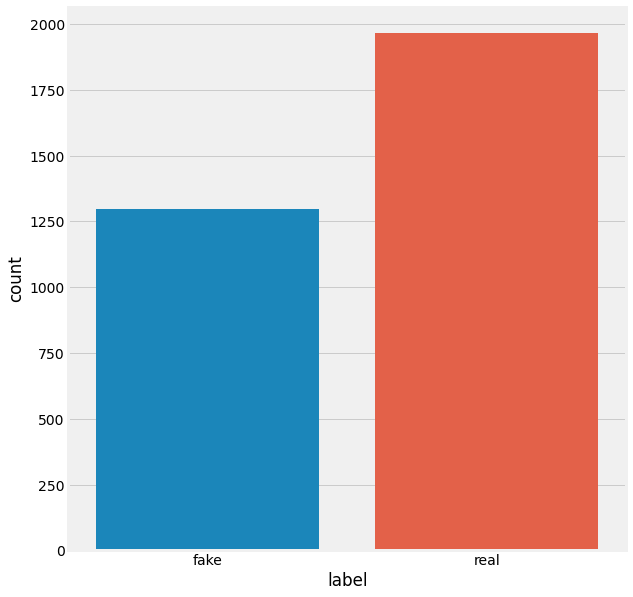

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.style.use("fivethirtyeight")
sns.countplot(labels)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['title'],labels,test_size=0.15,random_state=7)

In [ ]:
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=10)




In [ ]:
classifier.fit(tfidf_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
y_pred_DT=classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred_DT)

In [ ]:
print(f'Accuracy : {round(score*100,2)}%')

Accuracy : 76.12%


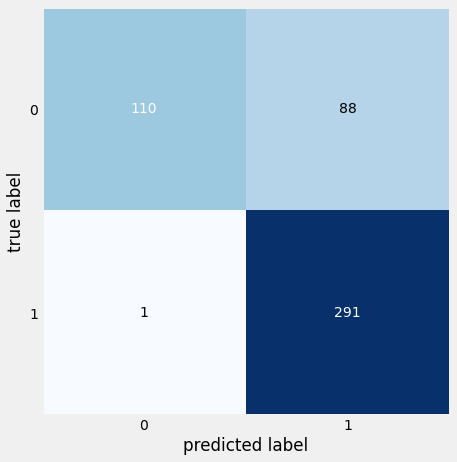

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cmDT = confusion_matrix(y_test,y_pred_DT)
plot_confusion_matrix(conf_mat = cmDT,figsize=(8,7));

**KFOLD CROSS VALIDATION - DECISION TREE**


In [ ]:
scores = cross_val_score(classifier, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)


In [ ]:
from statistics import mean

print(f'Accuracy : {round(mean(scores)*100,2)}%')

Accuracy : 76.76%


**K-EN YAKIN KOMŞULUK ALGORİTMASI**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(tfidf_train,y_train)

y_pred_KNN=knn.predict(tfidf_test)

scoreknn=accuracy_score(y_test,y_pred_KNN)
# Predict on dataset which model has not seen before
print(f'Accuracy : {round(scoreknn*100,2)}%')

Accuracy : 87.14%


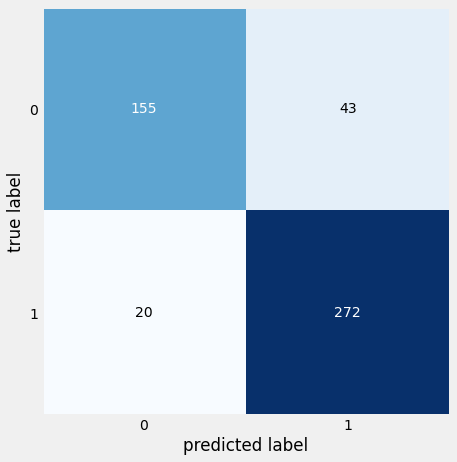

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cmKNN = confusion_matrix(y_test,y_pred_KNN)
plot_confusion_matrix(conf_mat = cmKNN,figsize=(8,7));

**KFOLD CROSS VALIDATION - K-NN**



In [ ]:
scoreKnnCrossVal= cross_val_score(knn, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)


In [ ]:
from statistics import mean

print(f'Accuracy : {round(mean(scoreKnnCrossVal)*100,2)}%')

Accuracy : 84.83%


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB 
bayes = BernoulliNB ()
tfidf_train_array=tfidf_train.toarray()

bayes.fit(tfidf_train_array, y_train)


BernoulliNB()

In [ ]:
y_pred_bayes = bayes.predict(tfidf_test.toarray())


In [ ]:
score_bayes=accuracy_score(y_test,y_pred_bayes)
# Predict on dataset which model has not seen before
print(f'Accuracy : {round(score_bayes*100,2)}%')

Accuracy : 85.51%


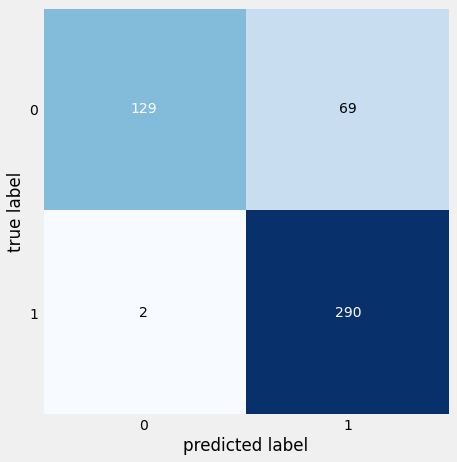

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cmBayes = confusion_matrix(y_test,y_pred_bayes)
plot_confusion_matrix(conf_mat = cmBayes,figsize=(8,7));

**KFOLD CROSS VALIDATION - BAYES**

> Girintili blok





In [ ]:
scoreBayesCrossVal= cross_val_score(bayes, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)


In [ ]:
from statistics import mean

print(f'Accuracy : {round(mean(scoreBayesCrossVal)*100,2)}%')

Accuracy : 87.07%


**KFOLD CROSS VALIDATION - BAYES**






In [ ]:
scoreKnnCrossVal= cross_val_score(knn, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)


In [ ]:
from statistics import mean

print(f'Accuracy : {round(mean(scoreKnnCrossVal)*100,2)}%')

Accuracy : 84.83%
